<h1><center>Praktikum Pemrosesan Data</center></h1>
<h2><center>Dosen Pengampu Edi Satriyanto S.Si., M.Si</center></h2>
<h2><center>Bot Telegram </center></h2>

#

#

#

<img src="logo pens.png" 
        alt="Picture" 
        width="380" 
        height="380" 
        style="display: block; margin: 0 auto" />

#

#

#

#

<h4><center>Wahyu Ikbal Maulana</center></h4>

<h4><center>3323600056</center></h4>

<h4><center>D4 SDT B</center></h4>

<h2><center>Politeknik Elektronika Negeri Surabaya</center></h2>

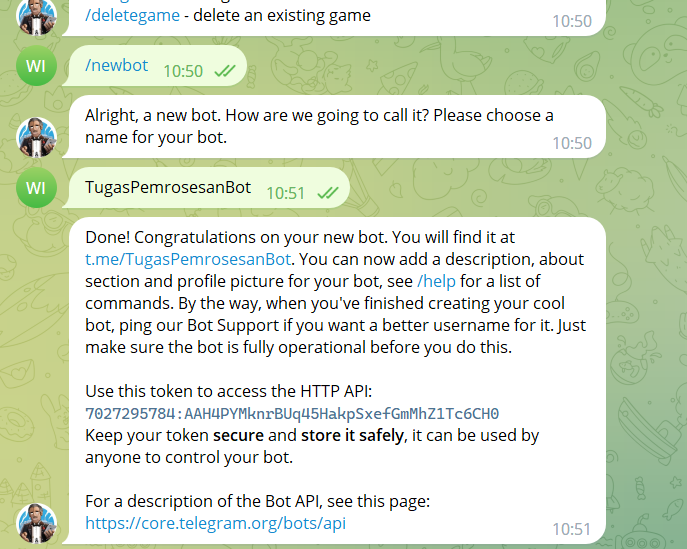

# Pertama-tama saya menginisiasi terlebih dahulu API untuk pembuatan Bot baru di @Botfather, kemudian saya mnginisasi codingannya di python vscode local

In [ ]:
import telebot
import time, threading, schedule

API_TOKEN = '7027295784:AAH4PYMknrBUq45HakpSxefGmMhZ1Tc6CH0'

bot = telebot.TeleBot(API_TOKEN)
@bot.message_handler(commands=['start', 'hello', 'waduh'])

def send_welcome(message):
    bot.reply_to(message, "Halo, selamat pagi")
    
@bot.message_handler(func=lambda msg: True)
def echo_all(message):
    bot.reply_to(message, message.text)

@bot.message_handler(commands=['help', 'start'])
def send_welcome(message):
    bot.reply_to(message, "Hi! Use /set <seconds> to set a timer")


def beep(chat_id) -> None:
    """Send the beep message."""
    bot.send_message(chat_id, text='Beep!')


@bot.message_handler(commands=['set'])
def set_timer(message):
    args = message.text.split()
    if len(args) > 1 and args[1].isdigit():
        sec = int(args[1])
        schedule.every(sec).seconds.do(beep, message.chat.id).tag(message.chat.id)
    else:
        bot.reply_to(message, 'Usage: /set <seconds>')


@bot.message_handler(commands=['unset'])
def unset_timer(message):
    schedule.clear(message.chat.id)


if __name__ == '__main__':
    threading.Thread(target=bot.infinity_polling, name='bot_infinity_polling', daemon=True).start()
    while True:
        schedule.run_pending()
        time.sleep(1)
        
bot.infinity_polling()

# Kemudian saya membuat kode sederhana untuk menampilkan feedback jika diberi perintah-perintah tertentu dan kode untuk perintah timer dan stopwatch

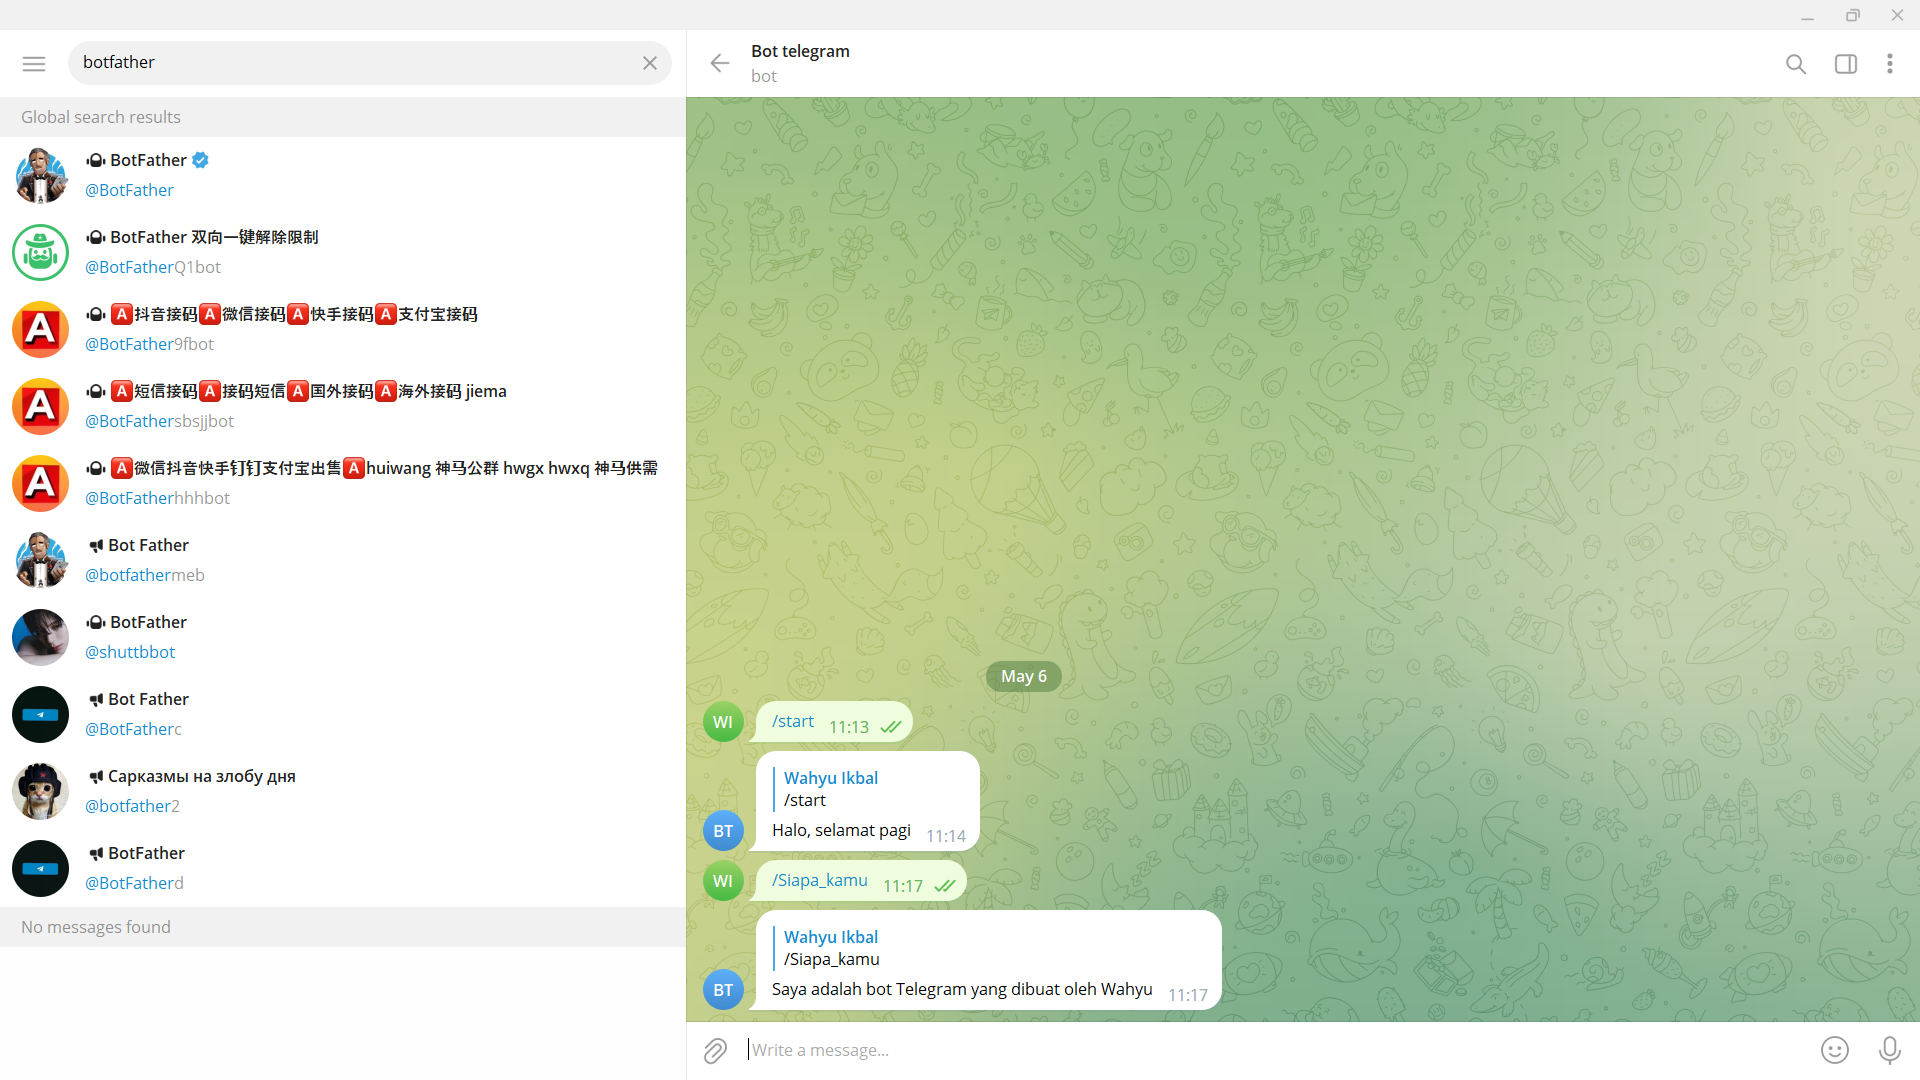

# Disini saya membuat program spesifik, alih alih hanya menampilkan gambar dan audio, disini saya membuat semacam kuis interaktif tapi dalam bentuk informasi zodiak, berikut detail kode nya dan screenshotnya

In [ ]:
import requests

def get_daily_horoscope(sign: str, day: str) -> dict:
    url = "https://horoscope-app-api.vercel.app/api/v1/get-horoscope/daily"
    params = {"sign": sign, "day": day}
    response = requests.get(url, params)

    return response.json()

{
   "data":{
      "date": "Dec 15, 2022",
      "horoscope_data": "Lie low during the day and try not to get caught up in the frivolous verbiage that dominates the waking hours. After sundown, feel free to speak your mind. You may notice that there is a sober tone and restrictive sensation today that leaves you feeling like you will never be able to break free from your current situation. Don't get caught in this negative mindset."
   },
   "status": 200,
   "success": true
}

@bot.message_handler(commands=['horoscope'])
def sign_handler(message):
    text = "What's your zodiac sign?\nChoose one: *Aries*, *Taurus*, *Gemini*, *Cancer,* *Leo*, *Virgo*, *Libra*, *Scorpio*, *Sagittarius*, *Capricorn*, *Aquarius*, and *Pisces*."
    sent_msg = bot.send_message(message.chat.id, text, parse_mode="Markdown")
    bot.register_next_step_handler(sent_msg, day_handler)
    
def day_handler(message):
    sign = message.text
    text = "What day do you want to know?\nChoose one: *TODAY*, *TOMORROW*, *YESTERDAY*, or a date in format YYYY-MM-DD."
    sent_msg = bot.send_message(
        message.chat.id, text, parse_mode="Markdown")
    bot.register_next_step_handler(
        sent_msg, fetch_horoscope, sign.capitalize())
    
def fetch_horoscope(message, sign):
    day = message.text
    horoscope = get_daily_horoscope(sign, day)
    data = horoscope["data"]
    horoscope_message = f'*Horoscope:* {data["horoscope_data"]}\\n*Sign:* {sign}\\n*Day:* {data["date"]}'
    bot.send_message(message.chat.id, "Here's your horoscope!")
    bot.send_message(message.chat.id, horoscope_message, parse_mode="Markdown")

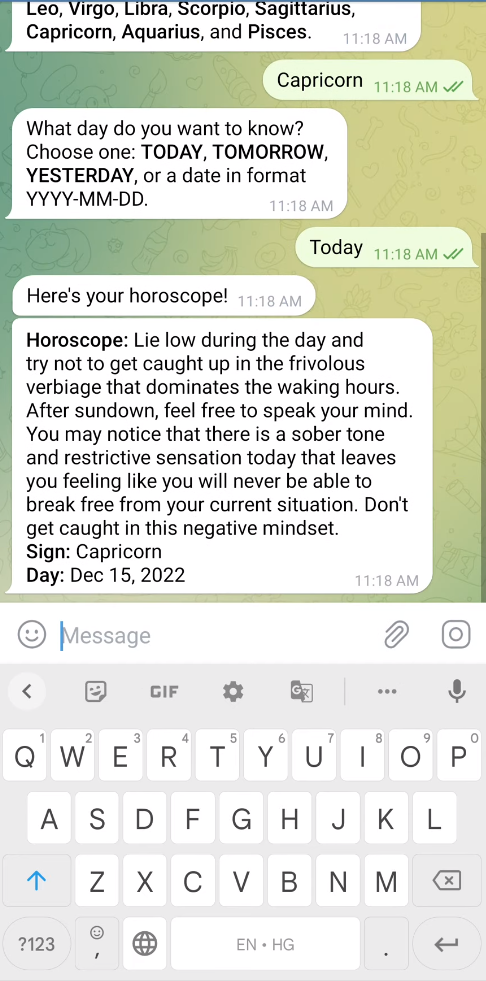

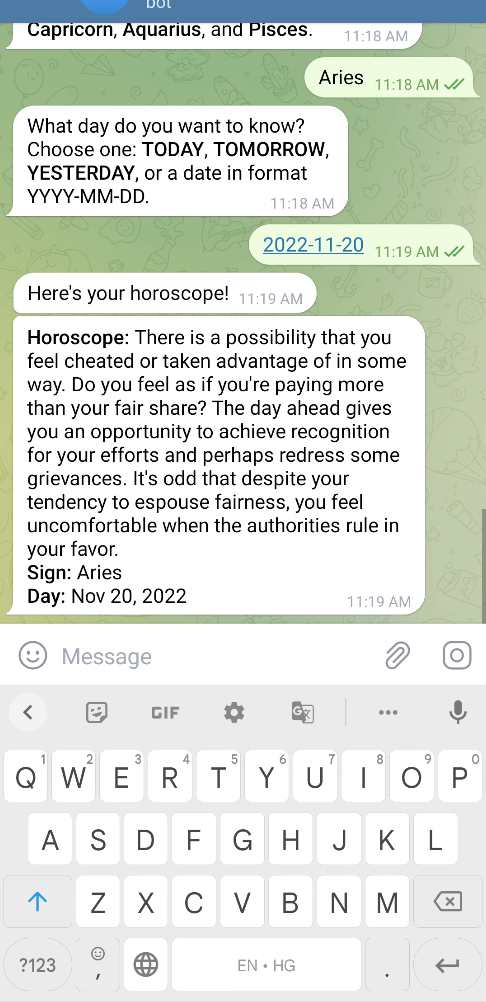